# **Data Cleaning & Preparation**

In this section, I’ll prepare the employee attrition dataset for modeling. My plan is to go step by step — first checking structure and data types, then verifying missing values and duplicates, and finally removing low-value columns and preparing the target variable.

---
## **Step 1 — Load Dataset and Basic Inspection**

I started by loading the dataset and doing a quick structural check. At this stage, I want to understand how many rows and columns I’m working with, what the column names look like, and whether the data types make sense.

This first pass helps me catch obvious issues early before making any cleaning decisions.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [4]:
#check dataset shape and size
df_shape = df.shape
print(f'The dataset has {df_shape[0]} rows and {df_shape[1]} columns.')
df_size = df.size
print(f'The dataset has {df_size} elements.')


The dataset has 1470 rows and 35 columns.
The dataset has 51450 elements.


In [5]:
# checking columns
df_columns = df.columns

print(f'The dataset consist of the following columns: {df_columns}')

The dataset consist of the following columns: Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [6]:
# checking the data description
df.describe(include='all')

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470,1470,1470.000000,1470,1470.000000,1470.000000,1470,1470.0,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
unique,NaN,2,3,NaN,3,NaN,NaN,6,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No,Travel_Rarely,NaN,Research & Development,NaN,NaN,Life Sciences,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1233,1043,NaN,961,NaN,NaN,606,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36.923810,NaN,NaN,802.485714,NaN,9.192517,2.912925,NaN,1.0,1024.865306,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,NaN,NaN,403.509100,NaN,8.106864,1.024165,NaN,0.0,602.024335,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,NaN,NaN,102.000000,NaN,1.000000,1.000000,NaN,1.0,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,NaN,NaN,465.000000,NaN,2.000000,2.000000,NaN,1.0,491.250000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,NaN,NaN,802.000000,NaN,7.000000,3.000000,NaN,1.0,1020.500000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,NaN,NaN,1157.000000,NaN,14.000000,4.000000,NaN,1.0,1555.750000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000


### ***Observation***

From the structure output, I can see the dataset size and the mix of numeric and categorical columns. The feature names are readable and consistent, which suggests the dataset is already fairly well organized. I’ll now move on to checking data quality issues directly.

## **Step 2 — Check for Missing Values**

At this stage, there is a need to check for missing values to determine whether any fields are incomplete. Identifying missing data early is important because it influences whether imputation, removal, or other correction methods will be required.

In [7]:
# checking for missing values
missing_vals = df.isnull().sum()
(missing_vals)

,0
Age,0
Attrition,0
BusinessTravel,0
DailyRate,0
Department,0
DistanceFromHome,0
Education,0
EducationField,0
EmployeeCount,0
EmployeeNumber,0


### **Observation**

No missing values were detected across the dataset columns. Since all fields are complete, no imputation step was required.

## **Duplicate Record Check**

Before proceeding, it is necessary to verify that each row represents a unique employee record. Duplicate rows can introduce bias into model training and evaluation, so this check is performed as part of basic data quality validation.

In [8]:
# checking for duplicate
duplicate = df.duplicated()
print(duplicate.sum())

0


### **Observation**

No duplicate rows were found in the dataset. Each record appears to be unique, so no rows were removed.

## **Low-Information and Identifier Columns**

Some columns may not contribute meaningful predictive value, such as identifier fields or columns with constant values across all rows. Reviewing column uniqueness helps identify such features so they can be removed where appropriate.

In [9]:
# identifying unuseful column
df.nunique().sort_values().head(20)

,0
EmployeeCount,1
Over18,1
StandardHours,1
Attrition,2
OverTime,2
PerformanceRating,2
Gender,2
BusinessTravel,3
Department,3
MaritalStatus,3


In [10]:
# dropping cols
drop_cols = ['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours']
df = df.drop(columns=[c for c in drop_cols if c in df.columns])


In [11]:
#checking info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EnvironmentSatisfaction   1470 non-null   int64 
 9   Gender                    1470 non-null   object
 10  HourlyRate                1470 non-null   int64 
 11  JobInvolvement            1470 non-null   int64 
 12  JobLevel                  1470 non-null   int64 
 13  JobRole                   1470 non-null   object
 14  JobSatisfaction         

### **Observation**

Identifier and constant-value columns were identified and removed. These fields do not provide useful predictive signal and would only add noise to the model.

## **Target Variable Description — Attrition**

In this dataset, attrition refers to employee turnover within the organization. The Attrition variable indicates whether an employee has left the company or remains employed at the time of data collection.

The variable is binary in nature. A value of 1 represents employees who left the organization, while 0 represents employees who stayed.

For this project, attrition serves as the target variable in a supervised classification task. All other features are analyzed to determine how strongly they relate to the likelihood of employee exit.

---
## **Target Variable Formatting**

Since this project is a classification task, the target variable needs to be in numeric form for model compatibility. The Attrition column currently uses text labels, so it needs to be converted into binary numeric values.

I will also review the class distribution to understand how balanced the outcome variable is, since this will later influence metric selection and evaluation strategy.

In [12]:
#changing the target variable 'Attrition' to numeric
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['Attrition'].value_counts()

,count
Attrition,
0,1233
1,237


### **Observation**

The target column was successfully converted to binary numeric format. The class distribution shows that non-attrition cases are more frequent than attrition cases, indicating a class imbalance that should be considered during model evaluation.

## **Feature Type Identification**

Before encoding, it is necessary to identify which features are categorical and which are numeric. Machine learning models require numeric inputs, so categorical variables will need to be encoded in a later step.

Separating feature types helps ensure the correct transformation method is applied to each group

In [13]:
#viewing all specified cols
cat_cols = df.select_dtypes(include=['object']).columns
num_cols = df.select_dtypes(exclude=['object']).columns

print(f'The categorical columns are: {cat_cols}')
print(f'The numerical columns are: {num_cols}')

The categorical columns are: Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')
The numerical columns are: Index(['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')


### **Observation**

Several features are categorical, including department, job role, travel category, and similar descriptive fields. These variables require encoding before they can be used in model training.

## **Categorical Feature Encoding**

Categorical variables are now encoded into numeric format using one-hot encoding. This approach creates indicator columns for each category and avoids introducing artificial ordering between category values.

One category per feature is dropped to prevent redundancy and multicollinearity.

In [14]:
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)
df_encoded.shape
df_encoded.head()

,Age,Attrition,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1,1102,1,2,2,94,3,2,4,...,False,False,False,False,False,True,False,False,True,True
1,49,0,279,8,1,3,61,2,2,2,...,False,False,False,False,True,False,False,True,False,False
2,37,1,1373,2,2,4,92,2,1,3,...,True,False,False,False,False,False,False,False,True,True
3,33,0,1392,3,4,4,56,3,1,3,...,False,False,False,False,True,False,False,True,False,True
4,27,0,591,2,1,1,40,3,1,2,...,True,False,False,False,False,False,False,True,False,False


### **Observation**

Categorical features were successfully transformed into numeric indicator columns. The dataset is now fully numeric and structured

**Target Distribution Review**

Before moving further, it is useful to examine the distribution of the target variable. This helps confirm class balance and gives an early signal of whether imbalance-aware evaluation will be necessary.

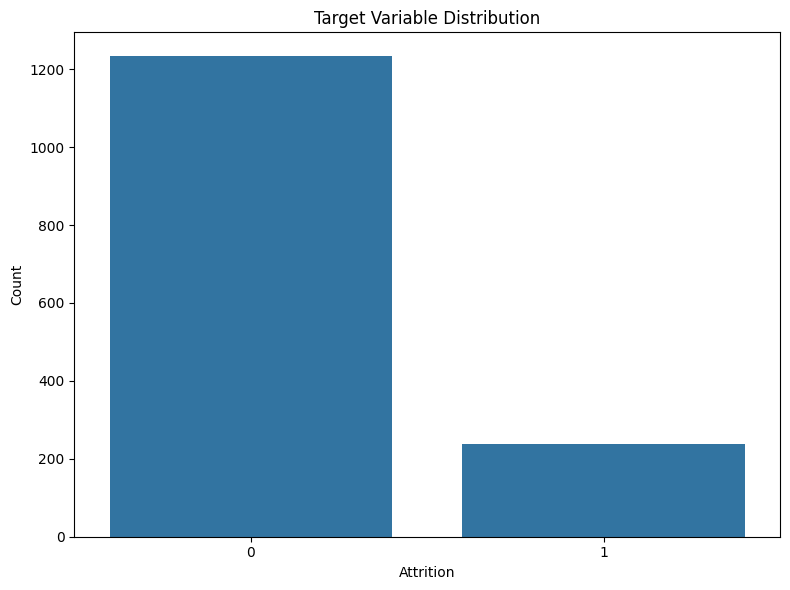

In [15]:
# checking the distribution of target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='Attrition', data=df_encoded)
plt.title('Target Variable Distribution')
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

## Observation
The class distribution plot confirms that non-attrition cases are more frequent than attrition cases. This indicates class imbalance, which will be considered later when selecting evaluation metrics.

## **Numeric Feature Distributions**

At this point, I am reviewing the distributions of selected numeric features to understand spread, skewness, and possible outliers. This helps determine whether scaling or transformation may be needed later.

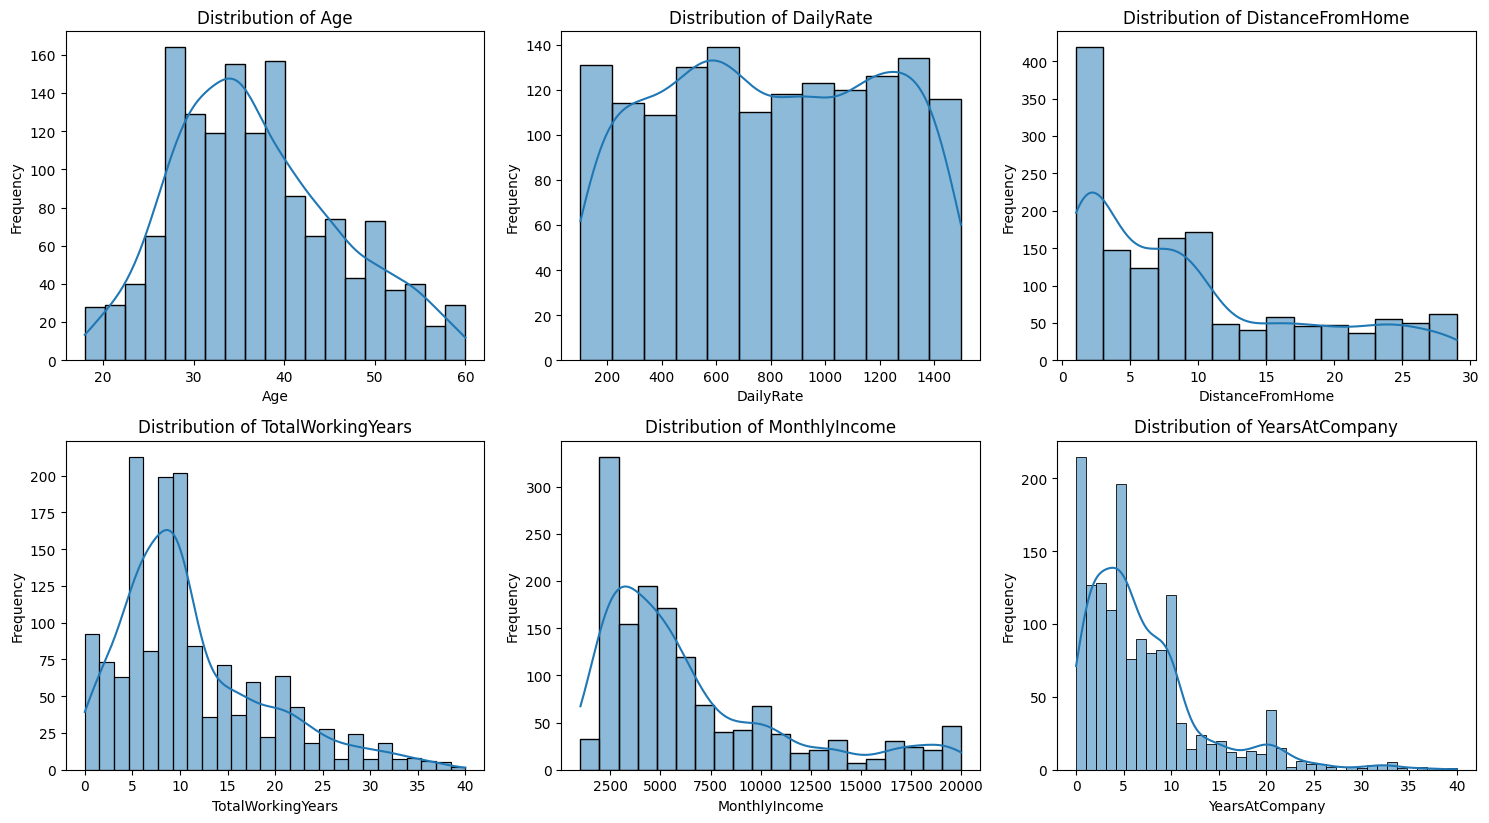

In [16]:
# plotting distribution within selected num_cols
selected_num_features = ['Age', 'DailyRate', 'DistanceFromHome', 'TotalWorkingYears', 'MonthlyIncome', 'YearsAtCompany']
plt.figure(figsize=(15,12))

for i, col in enumerate(selected_num_features):
    plt.subplot(3, 3, i + 1)
    sns.histplot(df_encoded[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

### **Observation**

The numeric distributions show different spread patterns across variables. Some features appear right-skewed, especially income-related variables, suggesting that scale differences exist across predictors.

## Numeric Features by Attrition Outcome

To understand how numeric variables differ across attrition outcomes, I am comparing their distributions grouped by the target class. This helps reveal early separation patterns.

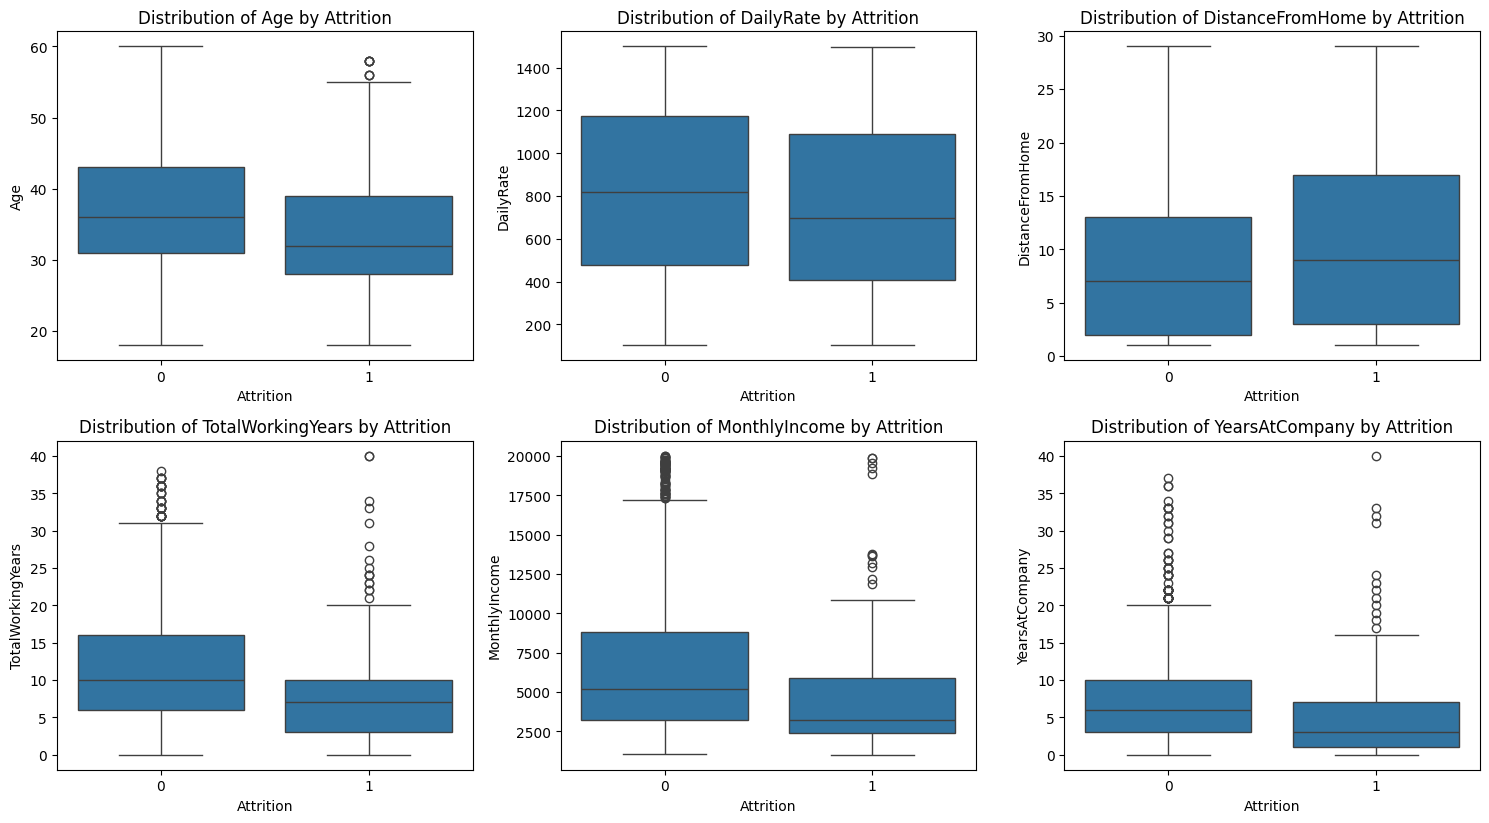

In [17]:
# understanding target variable against selected_num_features
plt.figure(figsize=(15, 12))
for i, col in enumerate(selected_num_features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x='Attrition', y=col, data=df_encoded)
    plt.title(f'Distribution of {col} by Attrition')
    plt.xlabel('Attrition')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

### **Observation**

The grouped boxplots show visible differences in some variables between attrition and non-attrition groups. This suggests that certain numeric features may carry predictive signal.

## **Selected Categorical Relationships**

I am also reviewing a few key categorical variables against attrition to see whether certain groups show higher exit rates.

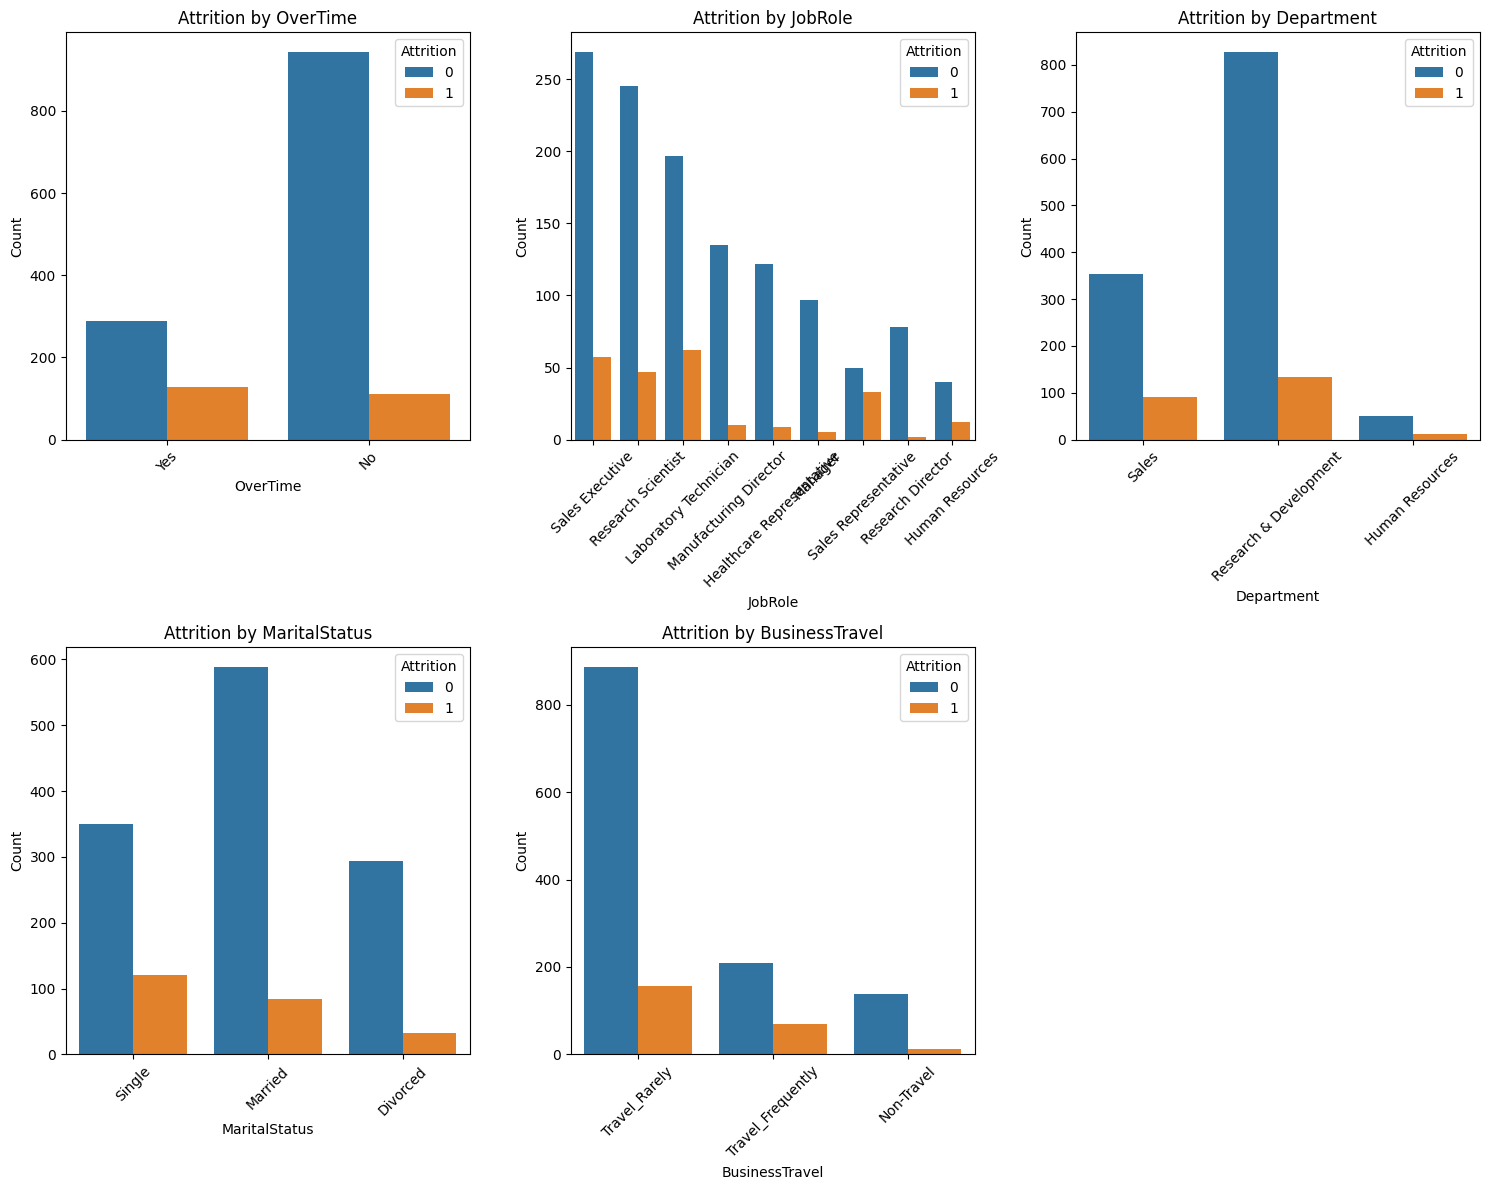

In [18]:
#checking some categorical columns vs target variable
selected_cat_features = ['OverTime', 'JobRole', 'Department', 'MaritalStatus', 'BusinessTravel']
plt.figure(figsize=(15, 12))
for i, col in enumerate(selected_cat_features):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=col, hue='Attrition', data=df)
    plt.title(f'Attrition by {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


### **Observation**

Some categorical groups show noticeably different attrition patterns, especially overtime status and certain job roles. These variables are likely to contribute useful signal during modeling.

In [19]:
# checking selected_cat_features via percentage
selected_cat_features
for col in selected_cat_features:
    print(f'\nAttrition Rate by {col}')
    print(pd.crosstab(df[col], df['Attrition'], normalize='index'))
    print


Attrition Rate by OverTime
Attrition         0         1
OverTime                     
No         0.895636  0.104364
Yes        0.694712  0.305288

Attrition Rate by JobRole
Attrition                         0         1
JobRole                                      
Healthcare Representative  0.931298  0.068702
Human Resources            0.769231  0.230769
Laboratory Technician      0.760618  0.239382
Manager                    0.950980  0.049020
Manufacturing Director     0.931034  0.068966
Research Director          0.975000  0.025000
Research Scientist         0.839041  0.160959
Sales Executive            0.825153  0.174847
Sales Representative       0.602410  0.397590

Attrition Rate by Department
Attrition                      0         1
Department                                
Human Resources         0.809524  0.190476
Research & Development  0.861602  0.138398
Sales                   0.793722  0.206278

Attrition Rate by MaritalStatus
Attrition             0         1
Marital

### **Observation**

The cross-tabulation results show noticeable variation in attrition rates across categories. For example, employees working overtime exhibit a higher proportion of attrition compared to those who do not. Similar patterns are observed across certain job roles and departments, suggesting that these factors may contribute to turnover risk.

In [20]:
#create a clean and processed data
df_encoded.to_csv('HR-Employee-Attrition-Cleaned.csv', index=False)

In [21]:
import os
csv_files = [file for file in os.listdir() if file.endswith('.csv')]
csv_files

['HR-Employee-Attrition.csv', 'HR-Employee-Attrition-Cleaned.csv']

# **Data Preparation Summary**

At this stage, the dataset has been carefully reviewed and prepared for analysis and modeling.

The process began with an examination of the dataset structure to understand how many records were present, what types of information were included, and how the variables were organized. This step helped establish a clear understanding of the data before making any changes.

The dataset was then checked for missing values to ensure completeness. No missing entries were found, meaning all employee records were fully populated. A duplicate record check was also conducted to confirm that each row represented a unique employee. No duplicates were detected.

Next, columns that did not contribute meaningful information were identified and removed. These included identifier-type fields and columns containing constant values, as they do not provide useful patterns for analysis.

The target variable, Attrition, was converted into a binary numeric format to support classification modeling. The class distribution revealed that more employees stayed than left, indicating a class imbalance that will be considered during evaluation.

Categorical variables such as job role, department, and travel category were transformed into numeric format using encoding techniques. This ensures compatibility with machine learning algorithms while preserving the meaning of the categories.

Finally, distribution visualizations were created to better understand how important variables relate to attrition. These visual checks provided early insight into patterns and potential predictive relationships.

Overall, the dataset is now clean, structured, and fully prepared for modeling. Each step was documented to maintain transparency and reproducibility, ensuring that the transition from raw data to analytical dataset is clear and defensible.

In [22]:
# saving the cleaned datasets
from google.colab import files
files.download('HR-Employee-Attrition-Cleaned.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>